In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import pickle

In [96]:
useD=pd.read_csv('./최종대여_12_11.csv', encoding="UTF-8")

In [97]:
returnD=pd.read_csv('./최종반납_12_11.csv', encoding="UTF-8")

In [98]:
useD.drop('Unnamed: 0',axis=1,inplace=True)
useD

,날짜,use_start_lng,use_start_lat,대여자수,최저기온(°C),최고기온(°C),강수유무,주간/주말
0,2022-01-07,127.289038,36.478950,5,-7.8,5.2,0,1
1,2022-01-07,127.294110,36.484045,2,-7.8,5.2,0,1
2,2022-01-07,127.289090,36.480842,3,-7.8,5.2,0,1
3,2022-01-07,127.281104,36.477518,2,-7.8,5.2,0,1
4,2022-01-07,127.286182,36.477736,2,-7.8,5.2,0,1
...,...,...,...,...,...,...,...,...
184058,2022-12-31,127.288275,36.478151,5,-4.8,4.5,0,0
184059,2022-12-31,127.281922,36.465565,2,-4.8,4.5,0,0
184060,2022-12-31,127.260913,36.515929,2,-4.8,4.5,0,0
184061,2022-12-31,127.279640,36.470920,1,-4.8,4.5,0,0


In [99]:
returnD.drop('Unnamed: 0',axis=1,inplace=True)
returnD

,날짜,use_end_lng,use_end_lat,대여자수,최저기온(°C),최고기온(°C),강수유무,주간/주말
0,2022-01-07,127.289038,36.478950,8,-7.8,5.2,0,1
1,2022-01-07,127.294110,36.484045,3,-7.8,5.2,0,1
2,2022-01-07,127.288405,36.480258,2,-7.8,5.2,0,1
3,2022-01-07,127.289090,36.480842,5,-7.8,5.2,0,1
4,2022-01-07,127.281104,36.477518,3,-7.8,5.2,0,1
...,...,...,...,...,...,...,...,...
183293,2022-12-31,127.288275,36.478151,5,-4.8,4.5,0,0
183294,2022-12-31,127.281922,36.465565,3,-4.8,4.5,0,0
183295,2022-12-31,127.260913,36.515929,1,-4.8,4.5,0,0
183296,2022-12-31,127.279640,36.470920,1,-4.8,4.5,0,0


In [100]:
# '날짜' 열의 '-'를 삭제
useD['날짜'] = useD['날짜'].astype(str).str.replace('-', '').str.replace('2022', '')

In [101]:
# '날짜' 열의 '-'를 삭제
returnD['날짜'] = returnD['날짜'].astype(str).str.replace('-', '').str.replace('2022', '')

In [102]:
useD

,날짜,use_start_lng,use_start_lat,대여자수,최저기온(°C),최고기온(°C),강수유무,주간/주말
0,0107,127.289038,36.478950,5,-7.8,5.2,0,1
1,0107,127.294110,36.484045,2,-7.8,5.2,0,1
2,0107,127.289090,36.480842,3,-7.8,5.2,0,1
3,0107,127.281104,36.477518,2,-7.8,5.2,0,1
4,0107,127.286182,36.477736,2,-7.8,5.2,0,1
...,...,...,...,...,...,...,...,...
184058,1231,127.288275,36.478151,5,-4.8,4.5,0,0
184059,1231,127.281922,36.465565,2,-4.8,4.5,0,0
184060,1231,127.260913,36.515929,2,-4.8,4.5,0,0
184061,1231,127.279640,36.470920,1,-4.8,4.5,0,0


In [103]:
returnD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183298 entries, 0 to 183297
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   날짜           183298 non-null  object 
 1   use_end_lng  183298 non-null  float64
 2   use_end_lat  183298 non-null  float64
 3   대여자수         183298 non-null  int64  
 4   최저기온(°C)     183298 non-null  float64
 5   최고기온(°C)     182721 non-null  float64
 6   강수유무         183298 non-null  int64  
 7   주간/주말        183298 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 11.2+ MB


In [104]:
# '날짜' 컬럼이 '0107'와 같은 문자열 형식일 경우
useD['날짜'] = pd.to_datetime(useD['날짜'], format='%m%d')

# 최솟값 찾기
min_date = useD['날짜'].min()

# 최솟값을 101로 변경
min_date = pd.to_datetime('0101', format='%m%d')

# '날짜' 컬럼에 최솟값 더하기
useD['날짜'] = (useD['날짜'] - min_date).dt.days + 101

# Min-Max 스케일링을 적용할 컬럼 선택
columns_to_scale = ['최저기온(°C)', '최고기온(°C)', '날짜']

# 선택한 컬럼에 Min-Max 스케일링 적용
scaler = MinMaxScaler()
useD[columns_to_scale] = scaler.fit_transform(useD[columns_to_scale])

# 결과 확인
print(useD)

         날짜  use_start_lng  use_start_lat  대여자수  최저기온(°C)  최고기온(°C)  강수유무  \
0       0.0     127.289038      36.478950     5  0.150376  0.258065     0   
1       0.0     127.294110      36.484045     2  0.150376  0.258065     0   
2       0.0     127.289090      36.480842     3  0.150376  0.258065     0   
3       0.0     127.281104      36.477518     2  0.150376  0.258065     0   
4       0.0     127.286182      36.477736     2  0.150376  0.258065     0   
...     ...            ...            ...   ...       ...       ...   ...   
184058  1.0     127.288275      36.478151     5  0.225564  0.240695     0   
184059  1.0     127.281922      36.465565     2  0.225564  0.240695     0   
184060  1.0     127.260913      36.515929     2  0.225564  0.240695     0   
184061  1.0     127.279640      36.470920     1  0.225564  0.240695     0   
184062  1.0     127.300812      36.483993     1  0.225564  0.240695     0   

        주간/주말  
0           1  
1           1  
2           1  
3          

0      0.00000
1      0.00000
2      0.00000
3      0.00000
4      0.00000
        ...   
595    0.00089
596    0.00089
597    0.00089
598    0.00089
599    0.00089
Name: 날짜, Length: 600, dtype: float64

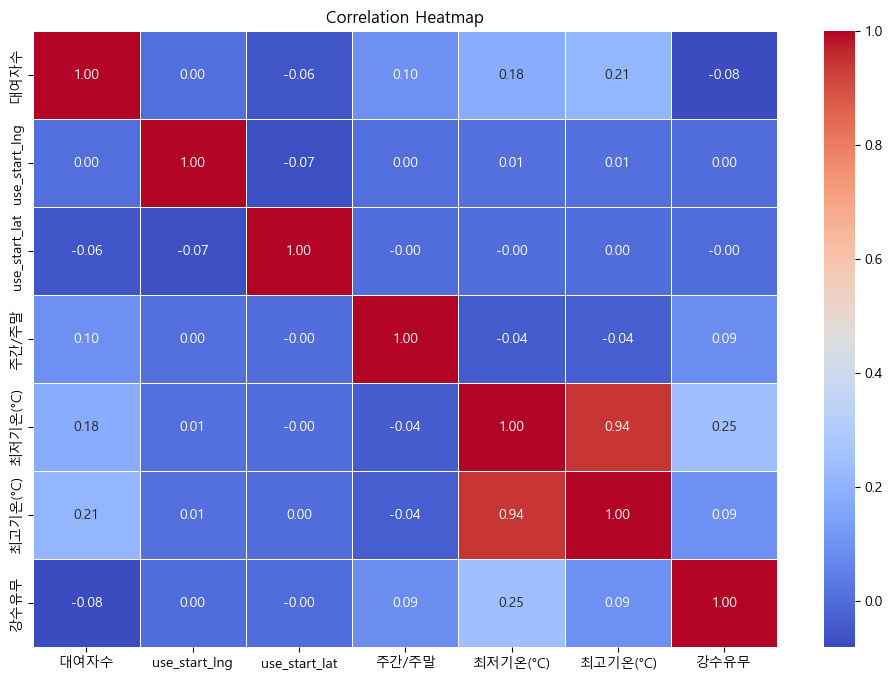

In [105]:
# 원하는 한글 폰트 경로로 수정
font_path = 'C:\\Windows\\Fonts\\malgun.ttf'

# 폰트 설정
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 대여자수, 평균기온(°C), 최저기온(°C), 최고기온(°C), 일강수량(mm), 평균 풍속(m/s)의 히트맵 생성
heatmap_columns = ['대여자수','use_start_lng', 'use_start_lat','주간/주말', '최저기온(°C)', '최고기온(°C)','강수유무']
heatmap_data = useD[heatmap_columns]


# 상관 행렬 재계산
correlation_matrix = heatmap_data.corr()

# 히트맵 생성
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\rlarn\AppData\Local\Temp\ipykernel_7084\1332065118.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='날짜', y='대여자수', data=weekday_hourly_total_rentals, ci=None)
C:\Users\rlarn\AppData\Local\Temp\ipykernel_7084\1332065118.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='날짜', y='대여자수', data=weekend_hourly_total_rentals, ci=None)


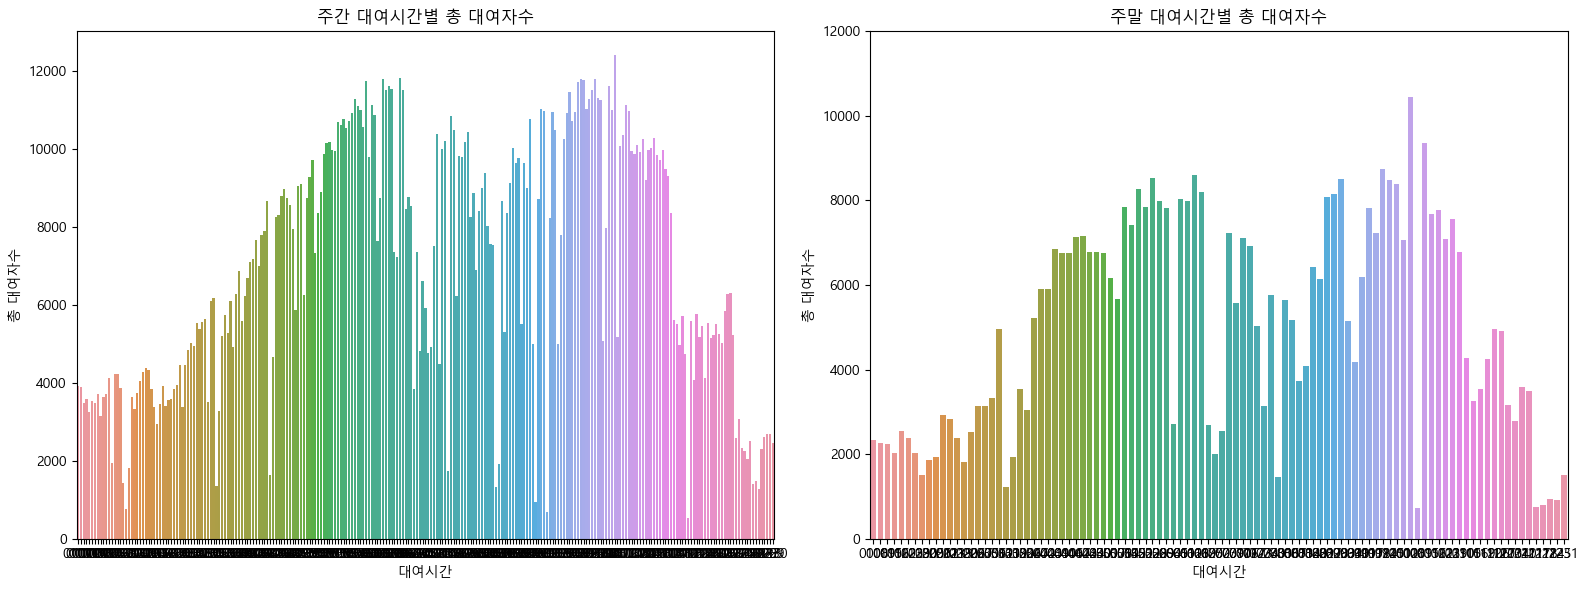

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
# '주간/주말' 열을 기반으로 주간과 주말 데이터 분리
weekday_data = useD[useD['주간/주말'] == True]
weekend_data = useD[useD['주간/주말'] == False]

# 주간 대여시간별 총 대여자수 계산
weekday_hourly_total_rentals = weekday_data.groupby('날짜')['대여자수'].sum().reset_index()

# 주말 대여시간별 총 대여자수 계산
weekend_hourly_total_rentals = weekend_data.groupby('날짜')['대여자수'].sum().reset_index()

# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # '맑은 고딕' 폰트를 사용하도록 설정
# 시각화
plt.figure(figsize=(16, 6))

# 주간 대여시간별 총 대여자수 시각화
plt.subplot(1, 2, 1)
sns.barplot(x='날짜', y='대여자수', data=weekday_hourly_total_rentals, ci=None)
plt.title('주간 대여시간별 총 대여자수')
plt.xlabel('대여시간')
plt.ylabel('총 대여자수')

# 주말 대여시간별 총 대여자수 시각화 (최대값을 100,000으로 제한)
plt.subplot(1, 2, 2)
sns.barplot(x='날짜', y='대여자수', data=weekend_hourly_total_rentals, ci=None)
plt.title('주말 대여시간별 총 대여자수')
plt.xlabel('대여시간')
plt.ylabel('총 대여자수')
plt.ylim(0, 12000)  # 최대값을 100,000으로 제한

plt.tight_layout()
plt.show()

In [13]:
weekday_hourly_total_rentals.sum()

날짜      0107011001110112011301140117011801190120012101...
대여자수                                              1729905
dtype: object

In [14]:
weekend_hourly_total_rentals.sum()

날짜      0108010901150116012201230129013002050206021202...
대여자수                                               502073
dtype: object

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = useD.drop('대여자수',axis = 1)
y = useD['대여자수']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 결과 확인
print(f'훈련 세트: {X_train.shape, y_train.shape}')
print(f'검증 세트: {X_valid.shape, y_valid.shape}')
print(f'테스트 세트: {X_test.shape, y_test.shape}')

훈련 세트: ((128844, 7), (128844,))
검증 세트: ((27609, 7), (27609,))
테스트 세트: ((27610, 7), (27610,))


In [115]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# XGBRegressor모델 초기화
xgb_model = xgb.XGBRegressor()

# GridSearchCV를 위한 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [300, 500, 1000],
    'max_depth': [7, 9, 11],
    'random_state' :[100]
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=4, scoring='neg_mean_squared_error', n_jobs=-1)

# GridSearchCV를 사용하여 모델 튜닝
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Parameters:", grid_search.best_params_)

# 최적의 모델
best_model = grid_search.best_estimator_

# 테스트 데이터로 예측
y_pred1 = best_model.predict(X_test)

# 예측 결과 평가 (평균제곱오차 사용)
mse1 = mean_squared_error(y_test, y_pred1)
print(f'Mean Squared Error on Test Data: {mse1}')

Best Parameters: {'max_depth': 7, 'n_estimators': 300, 'random_state': 100}
Mean Squared Error on Test Data: 36.5248360657658


In [116]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# XGBoost 회귀 모델 생성 및 학습
xgb_regressor = xgb.XGBRegressor(random_state=70, learning_rate=0.1, n_estimators=300, max_depth =7 , enable_categorical=True)
xgb_regressor.fit(X_train, y_train)

# 검증 세트를 사용한 모델 평가
y_valid_pred = xgb_regressor.predict(X_valid)
mse_valid = mean_squared_error(y_valid, y_valid_pred)


# 테스트 데이터로 예측 수행
y_pred = xgb_regressor.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# mse 회귀 모델의 주요 손실함수. 예측값과 실제값의 차이인 오차들의 제곱 평균으로 정의한다. 
# 0에 가까울수록 성능 좋다고 판단
print("Validation Mean Squared Error (MSE):", mse_valid)
print("Mean Squared Error (MSE):", mse)
# R-Squared (결정계수)분산기반 예측 성능 평가다른 MAE, R2은 상대적인 성능이 어느정도인지 직관적으로 판단할 수 있다. 
#1에 가까울수록 좋음
print("R-squared (R2):", r2) 

Validation Mean Squared Error (MSE): 40.00097886747902
Mean Squared Error (MSE): 37.79601755177066
R-squared (R2): 0.8205234807641244


In [118]:
print(y_pred)
print("R-squared (R2):", r2) 
print("Mean Squared Error (MSE):", mse)

[ 6.968467   7.1923347 50.442196  ...  4.4933825 12.759238   9.277645 ]
R-squared (R2): 0.8205234807641244
Mean Squared Error (MSE): 37.79601755177066


In [119]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_regressor, X_train, y_train, cv=5)

# 교차 검증 성능 출력
print("교차 검증 정확도: ", scores)
print("평균 정확도: ", scores.mean())

교차 검증 정확도:  [0.79419437 0.82553969 0.82202563 0.83644046 0.82295703]
평균 정확도:  0.8202314354732987


In [111]:
# pip install tensorflow

In [120]:
import pickle

# 모델을 파일로 저장 (피클)
with open('XGB최종모델(12.11).pkl', 'wb') as file:
    pickle.dump(xgb_regressor, file)

## 반납 XGBoost 모델 학습

In [121]:
returnD

,날짜,use_end_lng,use_end_lat,대여자수,최저기온(°C),최고기온(°C),강수유무,주간/주말
0,0107,127.289038,36.478950,8,-7.8,5.2,0,1
1,0107,127.294110,36.484045,3,-7.8,5.2,0,1
2,0107,127.288405,36.480258,2,-7.8,5.2,0,1
3,0107,127.289090,36.480842,5,-7.8,5.2,0,1
4,0107,127.281104,36.477518,3,-7.8,5.2,0,1
...,...,...,...,...,...,...,...,...
183293,1231,127.288275,36.478151,5,-4.8,4.5,0,0
183294,1231,127.281922,36.465565,3,-4.8,4.5,0,0
183295,1231,127.260913,36.515929,1,-4.8,4.5,0,0
183296,1231,127.279640,36.470920,1,-4.8,4.5,0,0


In [122]:
# '날짜' 컬럼이 '0107'와 같은 문자열 형식일 경우
returnD['날짜'] = pd.to_datetime(returnD['날짜'], format='%m%d')

# 최솟값 찾기
min_date = returnD['날짜'].min()

# 최솟값을 101로 변경
min_date = pd.to_datetime('0101', format='%m%d')

# '날짜' 컬럼에 최솟값 더하기
returnD['날짜'] = (returnD['날짜'] - min_date).dt.days + 101

# Min-Max 스케일링을 적용할 컬럼 선택
columns_to_scale = ['최저기온(°C)', '최고기온(°C)', '날짜']

# 선택한 컬럼에 Min-Max 스케일링 적용
scaler = MinMaxScaler()
returnD[columns_to_scale] = scaler.fit_transform(returnD[columns_to_scale])

# 결과 확인
print(returnD)

         날짜  use_end_lng  use_end_lat  대여자수  최저기온(°C)  최고기온(°C)  강수유무  주간/주말
0       0.0   127.289038    36.478950     8  0.150376  0.258065     0      1
1       0.0   127.294110    36.484045     3  0.150376  0.258065     0      1
2       0.0   127.288405    36.480258     2  0.150376  0.258065     0      1
3       0.0   127.289090    36.480842     5  0.150376  0.258065     0      1
4       0.0   127.281104    36.477518     3  0.150376  0.258065     0      1
...     ...          ...          ...   ...       ...       ...   ...    ...
183293  1.0   127.288275    36.478151     5  0.225564  0.240695     0      0
183294  1.0   127.281922    36.465565     3  0.225564  0.240695     0      0
183295  1.0   127.260913    36.515929     1  0.225564  0.240695     0      0
183296  1.0   127.279640    36.470920     1  0.225564  0.240695     0      0
183297  1.0   127.300812    36.483993     1  0.225564  0.240695     0      0

[183298 rows x 8 columns]


In [125]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X2 = returnD.drop('대여자수',axis = 1)
y2 = returnD['대여자수']

X2_train, X2_temp, y2_train, y2_temp = train_test_split(X2, y2, test_size=0.3, random_state=42)
X2_valid, X2_test, y2_valid, y2_test = train_test_split(X2_temp, y2_temp, test_size=0.5, random_state=42)

# 결과 확인
print(f'훈련 세트: {X2_train.shape, y2_train.shape}')
print(f'검증 세트: {X2_valid.shape, y2_valid.shape}')
print(f'테스트 세트: {X2_test.shape, y2_test.shape}')

훈련 세트: ((128308, 7), (128308,))
검증 세트: ((27495, 7), (27495,))
테스트 세트: ((27495, 7), (27495,))


In [126]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# XGBRegressor모델 초기화
return_xgb_model = xgb.XGBRegressor()

# GridSearchCV를 위한 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [300, 500, 1000],
    'max_depth': [7, 9, 11],
    'random_state' :[100]
}

# GridSearchCV 객체 생성
grid_search2 = GridSearchCV(estimator=return_xgb_model, param_grid=param_grid, cv=4, scoring='neg_mean_squared_error', n_jobs=-1)

# GridSearchCV를 사용하여 모델 튜닝
grid_search2.fit(X2_train, y2_train)

# 최적의 하이퍼파라미터 출력
print("Best Parameters:", grid_search2.best_params_)

# 최적의 모델
best2_model = grid_search2.best_estimator_

# 테스트 데이터로 예측
y2_pred1 = best2_model.predict(X2_test)

# 예측 결과 평가 (평균제곱오차 사용)
mse2 = mean_squared_error(y2_test, y2_pred1)
print(f'Mean Squared Error on Test Data: {mse2}')

Best Parameters: {'max_depth': 9, 'n_estimators': 300, 'random_state': 100}
Mean Squared Error on Test Data: 34.999776734175335


In [128]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# XGBoost 회귀 모델 생성 및 학습
xgb_regressor = xgb.XGBRegressor(random_state=80, learning_rate=0.1, n_estimators=300, max_depth =9 , enable_categorical=True)
xgb_regressor.fit(X2_train, y2_train)

# 검증 세트를 사용한 모델 평가
y2_valid_pred = xgb_regressor.predict(X2_valid)
mse2_valid = mean_squared_error(y2_valid, y2_valid_pred)


# 테스트 데이터로 예측 수행
y2_pred = xgb_regressor.predict(X2_test)

# 모델 평가
return_mse = mean_squared_error(y2_test, y2_pred)
return_r2 = r2_score(y2_test, y2_pred)

# mse 회귀 모델의 주요 손실함수. 예측값과 실제값의 차이인 오차들의 제곱 평균으로 정의한다. 
# 0에 가까울수록 성능 좋다고 판단
print("Validation Mean Squared Error (MSE):", mse2_valid)
print("Mean Squared Error (MSE):", return_mse)
# R-Squared (결정계수)분산기반 예측 성능 평가다른 MAE, R2은 상대적인 성능이 어느정도인지 직관적으로 판단할 수 있다. 
#1에 가까울수록 좋음
print("R-squared (R2):", return_r2) 

Validation Mean Squared Error (MSE): 40.94097040333236
Mean Squared Error (MSE): 33.858634764014276
R-squared (R2): 0.8648650295230201


In [129]:
print(y2_pred)
print("R-squared (R2):", return_r2) 
print("Mean Squared Error (MSE):", return_mse)

[16.83033    3.5716915  2.6337574 ...  3.5000532  2.852912   3.2524908]
R-squared (R2): 0.8648650295230201
Mean Squared Error (MSE): 33.858634764014276


In [130]:
from sklearn.model_selection import cross_val_score

scores2 = cross_val_score(xgb_regressor, X2_train, y2_train, cv=5)

# 교차 검증 성능 출력
print("교차 검증 정확도: ", scores2)
print("평균 정확도: ", scores2.mean())

교차 검증 정확도:  [0.85427337 0.86892842 0.86355869 0.85357442 0.84525802]
평균 정확도:  0.8571185825230081


In [131]:
import pickle

# 모델을 파일로 저장 (피클)
with open('XGB최종모델_반납(12.11).pkl', 'wb') as file:
    pickle.dump(xgb_regressor, file)